In [3]:
###### MODAL Basis EXPERIMENT ###########
from astropy.io import fits
import numpy as np
from magpyx.utils import ImageStream
from magpyx.utils import send_shmim_to_fits, send_fits_to_shmim
import matplotlib.pyplot as plt
from datetime import datetime
import time
from purepyindi.client import INDIClient
import library as lb
import os

In [4]:
siglentAmplitude=0.8
siglentFreq=1000
experimentName="modeExperiment"
#experimentName="darkFrames"
nImages=500
nModes=300
nAmps=0.1

In [9]:
pathToModes='/Users/laurenschatz/Documents/exao0Pull/Scripts/CUBE_SlepianModes_32x32_1_scaled32.fits'
fModes=fits.open(pathToModes)
pathToData='/Users/laurenschatz/Documents/exao0Pull/Scripts/'
pathToFlats=''
pathToDarks=''

Filename: /Users/laurenschatz/Documents/exao0Pull/Scripts/CUBE_SlepianModes_32x32_1_scaled32.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (32, 32, 1024)   float64   
(1024, 32, 32)


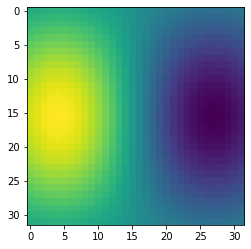

In [16]:
fModes.info()
mode=fModes[0].data
print(np.shape(mode))
plt.imshow(mode[1,:,:])

h=fModes[0].header
a=h['NAXIS3']

In [14]:
#INDI information
c=INDIClient('localhost', 7624)
c.start()
time.sleep(1)
#camtipExpTime=c['camtip.exptime.current']
zylaExpTime=0.001
sciExpTime=0.0003
tipExpTime=0.001
c['camtip.exptime.target']=tipExpTime
c['camsci.exptime.target']=sciExpTime
c['camzyla.exptime.target']=zylaExpTime

1024


In [ ]:
camsci=ImageStream("camsci")
camtip=ImageStream("camtip")
camzyla=ImageStream("camzyla")
dm=ImageStream("dm00disp03")


In [ ]:
##### TAKE DARKS ########

c['pdu0.laser.target']="Off"

nameZyla= pathToDarks+"camzylaDarkFrames.fits"
nameCamsci= pathToDarks+"camsciDarkFrames.fits"

## Zyla -------------------------------------------
if nImages==1:
    zyladata=camzyla.grab_latest()
else:
    zyladata=np.squeeze(camzyla.grab_many(nImages))
    # Get INDI data        

zyladark=zyladata.mean(axis=0)
   #Generate Headers     
y=fits.PrimaryHDU(zyladark)
y.header['ExpTime']=camzylaExpTime
y.header['TStamp']=dateStr
y.header['ModAmp']=siglentAmplitude
y.header['ModFreq']=siglentFreq
y.header['FPS']=camzylaFrameRate
y.header['ROIsize']=camzylaROIsize
y.header['ExpName']=experimentName
     
  #write file      
y.writeto(nameZyla)
time.sleep(2)
print('Finished camzyla')
        
## Camsci ----------------------------------------------
if nImages==1:
    scidata=camsci.grab_latest()
else:
    scidata=np.squeeze(camsci.grab_many(nImages))
    # Get INDI data        
scidark=scidata.mean(axis=0)
   #Generate Headers 
    
x=fits.PrimaryHDU(scidark)
x.header['ExpTime']=camsciExpTime
x.header['TStamp']=dateStr
x.header['ModAmp']=siglentAmplitude
x.header['ModFreq']=siglentFreq
x.header['ExpName']=experimentName
     
  #write file      
x.writeto(nameCamsci)
time.sleep(2)
print('Finished camsci')

c['pdu0.laser.target']="On"
time.sleep(5)
       

In [ ]:
##################### FLATS ############################

nameZyla= pathToFlats+"camzylaFlatFrames.fits"
nameCamsci= pathToFlats+"camsciFlatFrames.fits"

## Zyla -------------------------------------------
if nImages==1:
    zyladata=camzyla.grab_latest()
else:
    zyladata=np.squeeze(camzyla.grab_many(nImages))
    # Get INDI data        

zyladark=zyladata.mean(axis=0)
   #Generate Headers     
y=fits.PrimaryHDU(zyladark)
y.header['ExpTime']=camzylaExpTime
y.header['TStamp']=dateStr
y.header['ModAmp']=siglentAmplitude
y.header['ModFreq']=siglentFreq
y.header['FPS']=camzylaFrameRate
y.header['ROIsize']=camzylaROIsize
y.header['ExpName']=experimentName
     
  #write file      
y.writeto(nameZyla)
time.sleep(2)
print('Finished camzyla')
        
## Camsci ----------------------------------------------
if nImages==1:
    scidata=camsci.grab_latest()
else:
    scidata=np.squeeze(camsci.grab_many(nImages))
    # Get INDI data        
scidark=scidata.mean(axis=0)
   #Generate Headers 
    
x=fits.PrimaryHDU(scidark)
x.header['ExpTime']=camsciExpTime
x.header['TStamp']=dateStr
x.header['ModAmp']=siglentAmplitude
x.header['ModFreq']=siglentFreq
x.header['ExpName']=experimentName
     
  #write file      
x.writeto(nameCamsci)
time.sleep(2)
print('Finished camsci')


In [ ]:

for i in range(nModes):
    nameZyla= pathToData+"camzyla"+experimentName+"Mode"+str(i)+"AmpNum"+str(nAmps)+".fits"
    nameCamsci= pathToData+"camsci"+experimentName+"Mode"+str(i)+"AmpNum"+str(nAmps)+".fits"   
    #send DM commands
    dmCom=mode[i,:,:]*nAmps
    dm.write(dmCom.astype(dm.buffer.dtype))  
    time.sleep(5)
    print("Amp=" , nAmps)
    print("Mode=",i)
    #Take data and save it
## Zyla -------------------------------------------
    if nImages==1:
        zyladata=camzyla.grab_latest()
    else:
        zyladata=np.squeeze(camzyla.grab_many(nImages))
    # Get INDI data        
    zylaMode=zyladata.mean(axis=0)
   #Generate Headers     
    y=fits.PrimaryHDU(zylaMode)
    y.header['ExpTime']=camzylaExpTime
    y.header['TStamp']=dateStr
    y.header['ModAmp']=siglentAmplitude
    y.header['ModFreq']=siglentFreq
    y.header['FPS']=camzylaFrameRate
    y.header['ROIsize']=camzylaROIsize
    y.header['nMode']=i
    y.header['modeAmp']=nAmps
    y.header['ExpName']=experimentName
     
  #write file      
    y.writeto(nameZyla)
    time.sleep(2)
    print('Finished camzyla')
    
## Camsci ----------------------------------------------
        if nImages==1:
            scidata=camsci.grab_latest()
        else:
            scidata=np.squeeze(camsci.grab_many(nImages))
    # Get INDI data        
        sciMode=scidata.mean(axis=0)
   #Generate Headers     
        y=fits.PrimaryHDU(sciMode)
        y.header['ExpTime']=camsciExpTime
        y.header['TStamp']=dateStr
        y.header['ModAmp']=siglentAmplitude
        y.header['ModFreq']=siglentFreq
        y.header['nMode']= i
        y.header['modeAmp']=nAmps
        y.header['ExpName']=experimentName
     
  #write file      
        y.writeto(nameCamsci)
        time.sleep(2)
        print('Finished camsci')
        
print("finished experiment")